# 10. Data Vizualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# bokeh
# plotly
# tabpy --> tableau + Python


In [2]:
# sns.set(style="whitegrid")

In [3]:
PATH_DATA = '../mydata/'
PLOT_RES = '../img/plot/'

## Get data

In [4]:
df_trx = pd.read_csv(PATH_DATA+'food_delivery_datasets.csv')

In [5]:
df_trx.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587


In [7]:
df_trx.isnull().sum()

order_id            0
voucher_amount      0
date_time           0
eta_seconds         0
food_price          0
cust_id             0
rating            478
delivery_fee        0
resto_id            0
status              0
random_id           0
dtype: int64

In [8]:
df_trx0 = df_trx.copy()

## Histogram / Distribution Plot

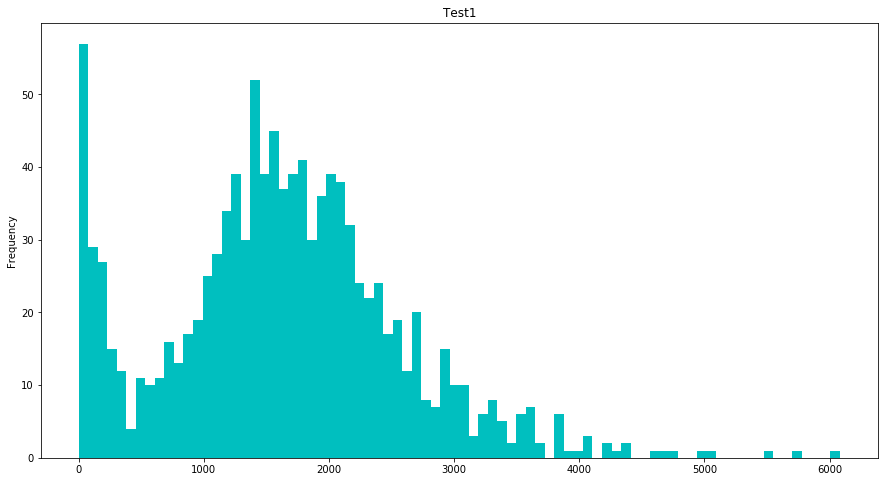

In [33]:
fig_save = df_trx['eta_seconds'].plot(kind = 'hist',figsize = (15,8), bins = 80, title = 'Test1', color = 'c')

In [27]:
## Save
fig_save.get_figure().savefig(PLOT_RES+'histogram1.png')

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


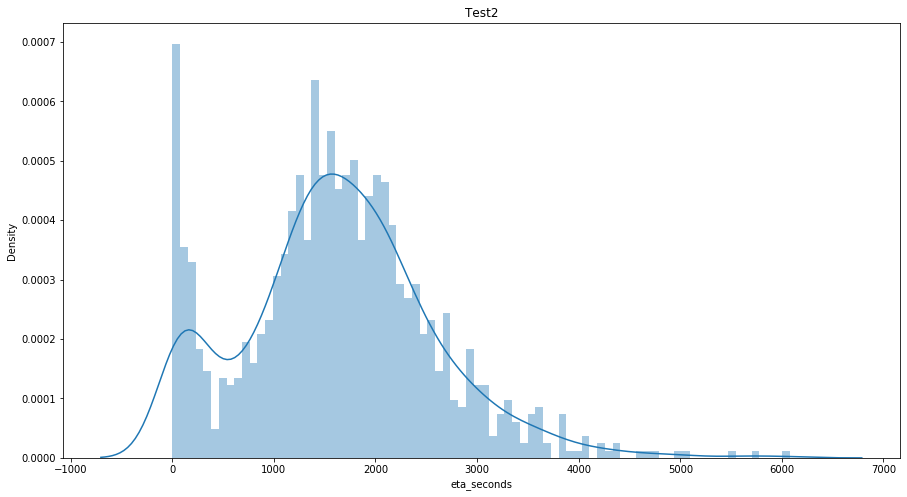

In [28]:
plt.figure(figsize=(15,8))
plt.title('Test2')
fig_save = sns.distplot(df_trx['eta_seconds'],label = 'eta dist', bins = 80)

In [29]:
## Save
fig_save.get_figure().savefig(PLOT_RES+'histogram2.png')

## Line

In [34]:
df_trx = df_trx0.copy()

In [35]:
df_trx.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587


In [36]:
df_trx['date_time'] = pd.to_datetime(df_trx['date_time'])
df_trx['date'] = df_trx['date_time'].dt.strftime('%Y-%m-%d')
df_trx['day'] = df_trx['date_time'].dt.strftime('%A')
df_trx['is_completed'] = (df_trx['status']=='Completed').astype(int)

In [37]:
df_trx.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id,date,day,is_completed
0,FOOD-10455,0,2018-08-12 20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149,2018-08-12,Sunday,1
1,FOOD-10985,0,2018-09-23 17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936,2018-09-23,Sunday,1
2,FOOD-10911,0,2018-09-19 18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026,2018-09-19,Wednesday,1
3,FOOD-10932,0,2018-09-21 01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377,2018-09-21,Friday,1
4,FOOD-10961,0,2018-09-22 17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587,2018-09-22,Saturday,1


In [46]:
trx_cnt = df_trx.groupby(['date']).order_id.size()
trx_cnt ## --> Series

date
2018-07-01    11
2018-07-02     7
2018-07-03    11
2018-07-04    13
2018-07-05     7
              ..
2018-09-26    11
2018-09-27    11
2018-09-28    12
2018-09-29     6
2018-09-30    21
Name: order_id, Length: 92, dtype: int64

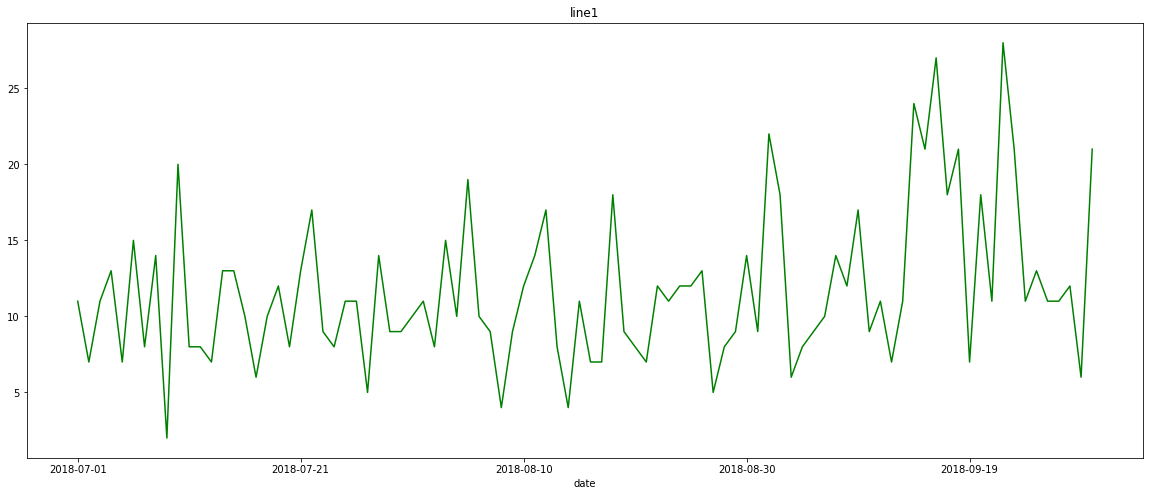

In [41]:
# type(trx_cnt)
trx_cnt.plot(figsize = (20,8),title = 'line1', color = 'g') ##

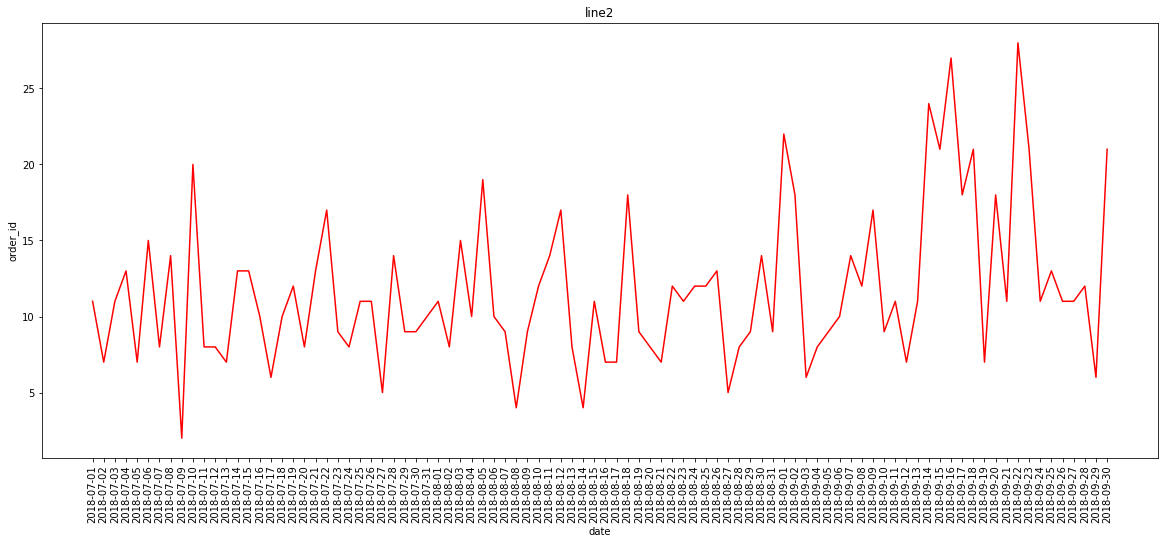

In [49]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.title('line2')
sns.lineplot(data = trx_cnt, color = 'r')
# sns.lineplot(data = [1,2,3,4,5,1,2,3,4,5,1,2,3,5,5,5,5])

In [50]:
df_trx.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id,date,day,is_completed
0,FOOD-10455,0,2018-08-12 20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149,2018-08-12,Sunday,1
1,FOOD-10985,0,2018-09-23 17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936,2018-09-23,Sunday,1
2,FOOD-10911,0,2018-09-19 18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026,2018-09-19,Wednesday,1
3,FOOD-10932,0,2018-09-21 01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377,2018-09-21,Friday,1
4,FOOD-10961,0,2018-09-22 17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587,2018-09-22,Saturday,1


In [54]:
trx_cnt2 = df_trx.groupby(['date','day','status']).order_id.size().reset_index()
trx_cnt2.head()

,date,day,status,order_id
0,2018-07-01,Sunday,Completed,11
1,2018-07-02,Monday,Cancelled,2
2,2018-07-02,Monday,Completed,5
3,2018-07-03,Tuesday,Cancelled,1
4,2018-07-03,Tuesday,Completed,10


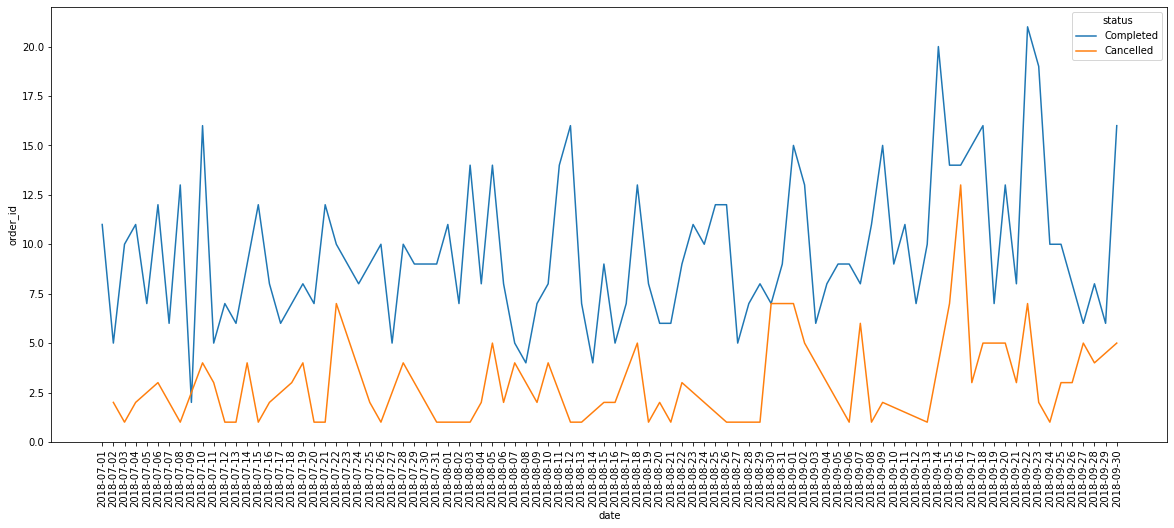

In [56]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.lineplot(data = trx_cnt2, x = 'date', y = 'order_id', hue = 'status')

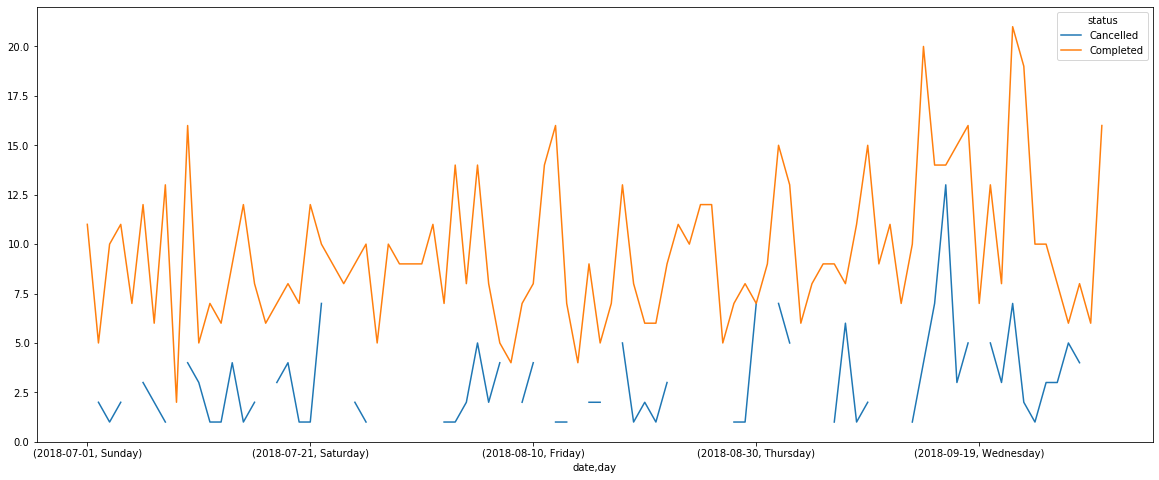

In [79]:
## how to do it with Pandas ??
trx_cnt3 = df_trx.groupby(['date','day','status']).order_id.size()
trx_cnt3.unstack().plot(kind = 'line',figsize=(20,8))

## Bar

In [83]:
trx_cnt2.head()

,date,day,status,order_id
0,2018-07-01,Sunday,Completed,11
1,2018-07-02,Monday,Cancelled,2
2,2018-07-02,Monday,Completed,5
3,2018-07-03,Tuesday,Cancelled,1
4,2018-07-03,Tuesday,Completed,10


In [84]:
trx_cnt3 = trx_cnt2[trx_cnt2.date<'2018-07-15']
trx_cnt3.head()

,date,day,status,order_id
0,2018-07-01,Sunday,Completed,11
1,2018-07-02,Monday,Cancelled,2
2,2018-07-02,Monday,Completed,5
3,2018-07-03,Tuesday,Cancelled,1
4,2018-07-03,Tuesday,Completed,10


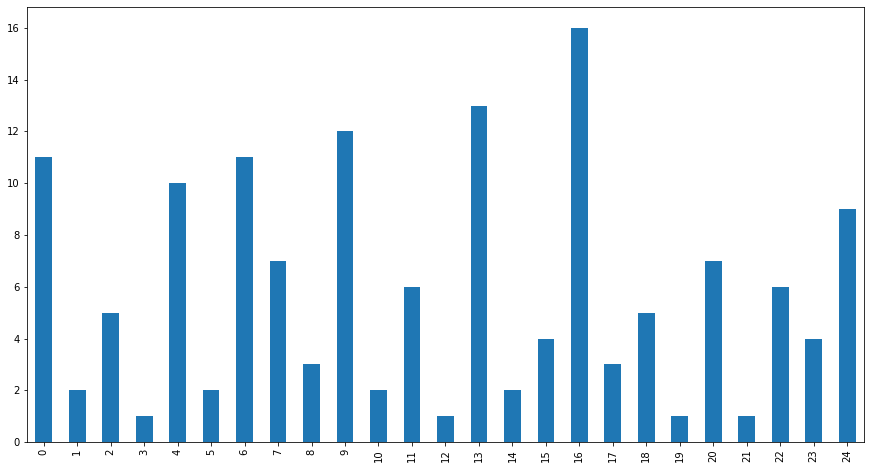

In [85]:
trx_cnt3['order_id'].plot(kind = 'bar', figsize = (15,8))

In [86]:
trx_cnt4 = trx_cnt3.set_index('date')
trx_cnt4.head()

,day,status,order_id
date,,,
2018-07-01,Sunday,Completed,11
2018-07-02,Monday,Cancelled,2
2018-07-02,Monday,Completed,5
2018-07-03,Tuesday,Cancelled,1
2018-07-03,Tuesday,Completed,10


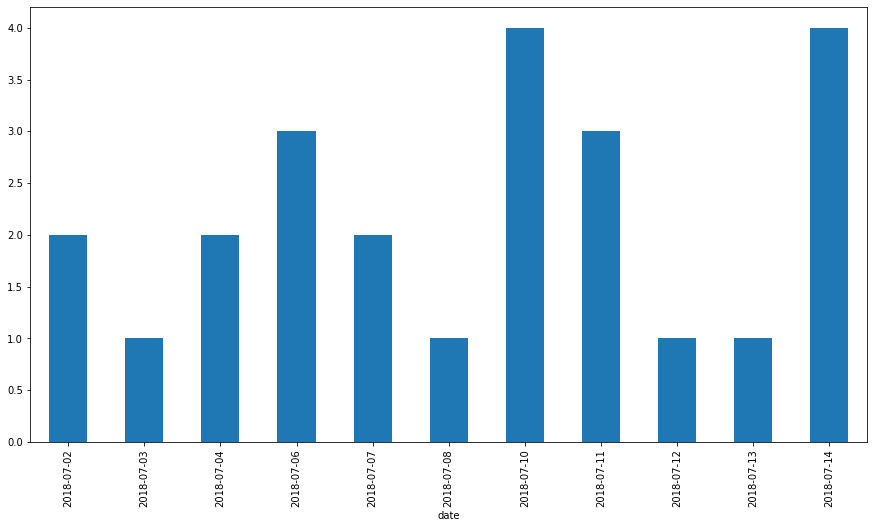

In [87]:
trx_cnt4[trx_cnt4.status == 'Cancelled']['order_id'].plot(kind = 'bar', figsize = (15,8))
# trx_cnt4['order_id'].sort_values().plot(kind = 'bar', figsize = (15,8))

In [90]:
trx_cnt3.head()

,date,day,status,order_id
0,2018-07-01,Sunday,Completed,11
1,2018-07-02,Monday,Cancelled,2
2,2018-07-02,Monday,Completed,5
3,2018-07-03,Tuesday,Cancelled,1
4,2018-07-03,Tuesday,Completed,10


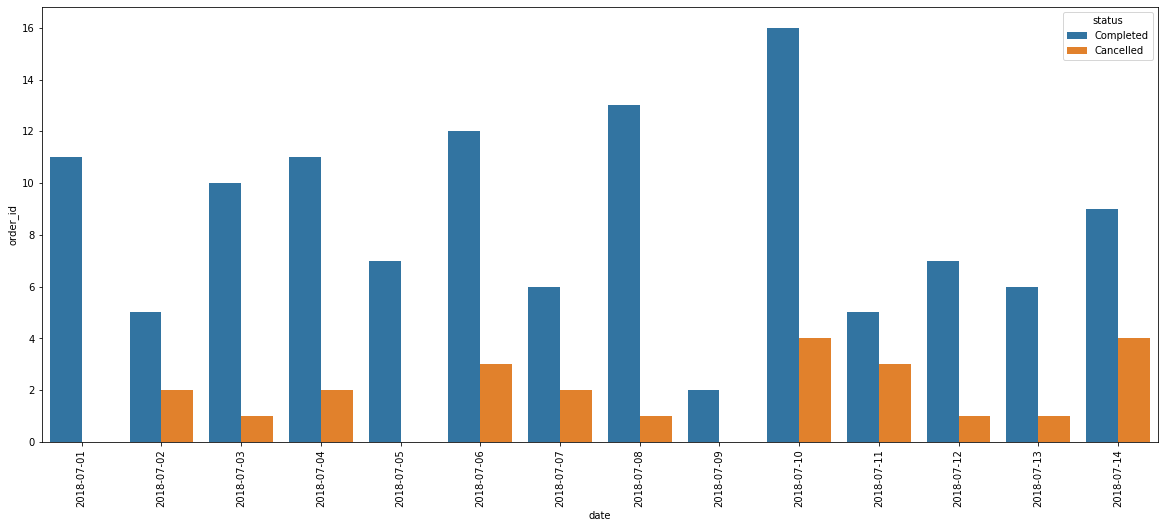

In [98]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(data = trx_cnt3, x = 'date', y = 'order_id', hue = 'status')
# sns.barplot(data = trx_cnt3, y = 'date', x = 'order_id', hue = 'status')

## Pie Chart

In [100]:
trx_cnt_day = df_trx.groupby(['day']).order_id.size()

In [101]:
trx_cnt_day ## Series

day
Friday       151
Monday       112
Saturday     191
Sunday       226
Thursday     137
Tuesday      136
Wednesday    123
Name: order_id, dtype: int64

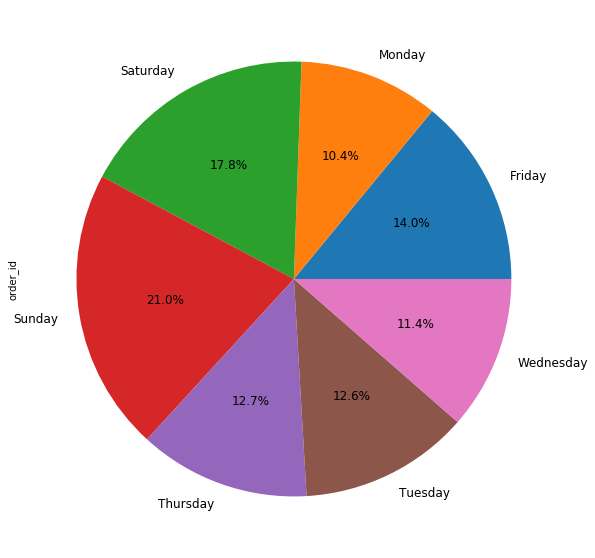

In [107]:
trx_cnt_day.plot(kind = 'pie', figsize = (10,10), autopct='%.1f%%', fontsize=12)

## Multichart

In [114]:
trx_rate = df_trx.groupby(['date']).agg({'order_id':np.size,'is_completed':np.mean,'resto_id':pd.Series.nunique,'cust_id':pd.Series.nunique})
trx_rate.columns = ['order_cnt','completed_rate','resto_unique_cnt','customer_unique_cnt']
trx_rate = trx_rate['2018-07-21':'2018-08-18']

In [116]:
trx_rate.sample(10)

,order_cnt,completed_rate,resto_unique_cnt,customer_unique_cnt
date,,,,
2018-08-11,14,1.000000,14,14
2018-07-28,14,0.714286,12,10
2018-08-06,10,0.800000,8,8
2018-08-15,11,0.818182,8,7
2018-08-02,8,0.875000,7,7
2018-07-21,13,0.923077,11,10
2018-07-29,9,1.000000,9,7
2018-07-31,10,0.900000,10,9
2018-07-27,5,1.000000,5,5


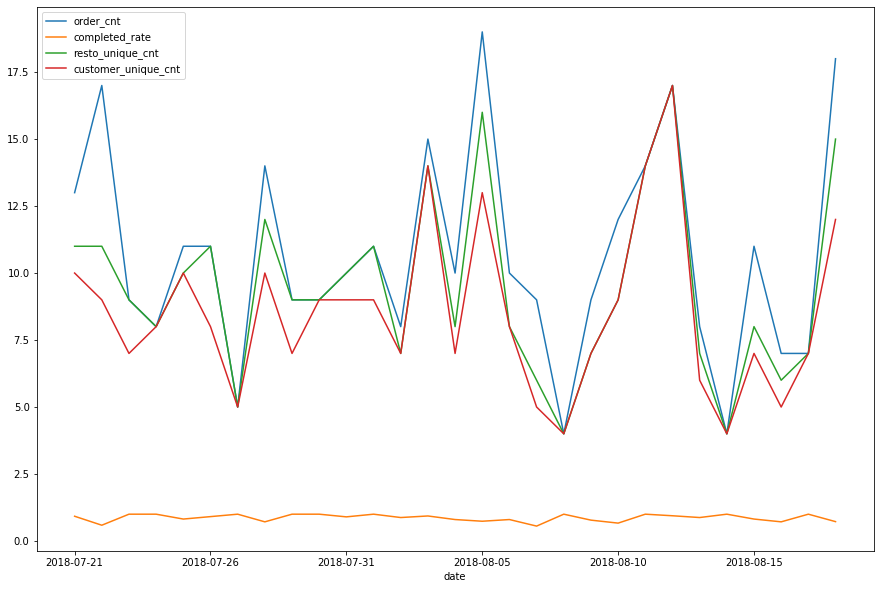

In [120]:
trx_rate.plot(figsize = (15,10))

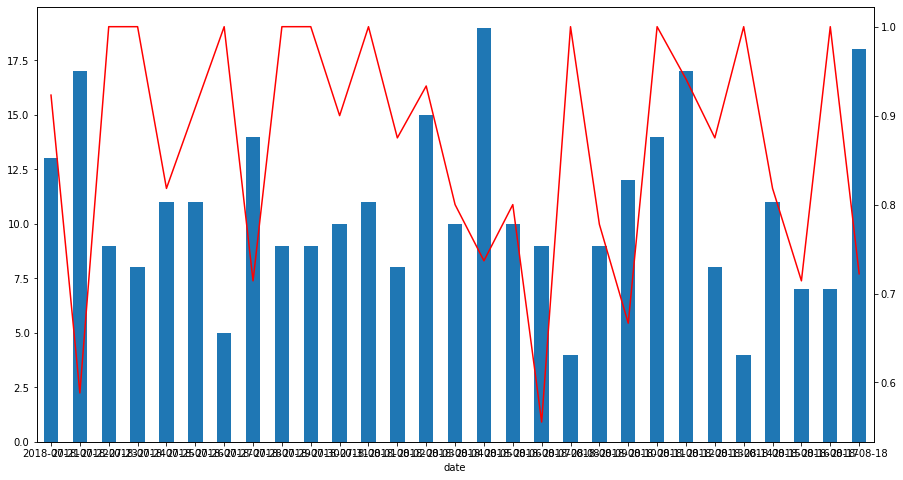

In [131]:
trx_rate['order_cnt'].plot(kind = 'bar', figsize = (15,8))
trx_rate['completed_rate'].plot(kind = 'line', color = 'r', secondary_y=True)

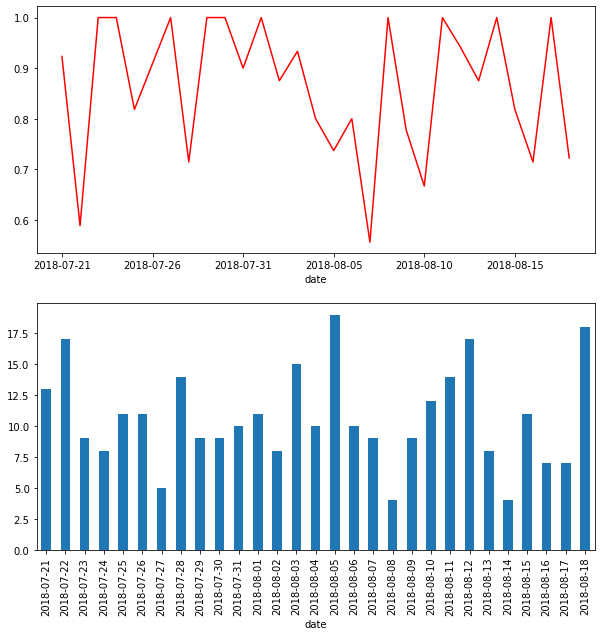

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=1)
trx_rate['order_cnt'].plot(kind = 'bar',figsize=(10,10), ax = axes[1])
trx_rate['completed_rate'].plot(kind = 'line', color = 'r', ax = axes[0])

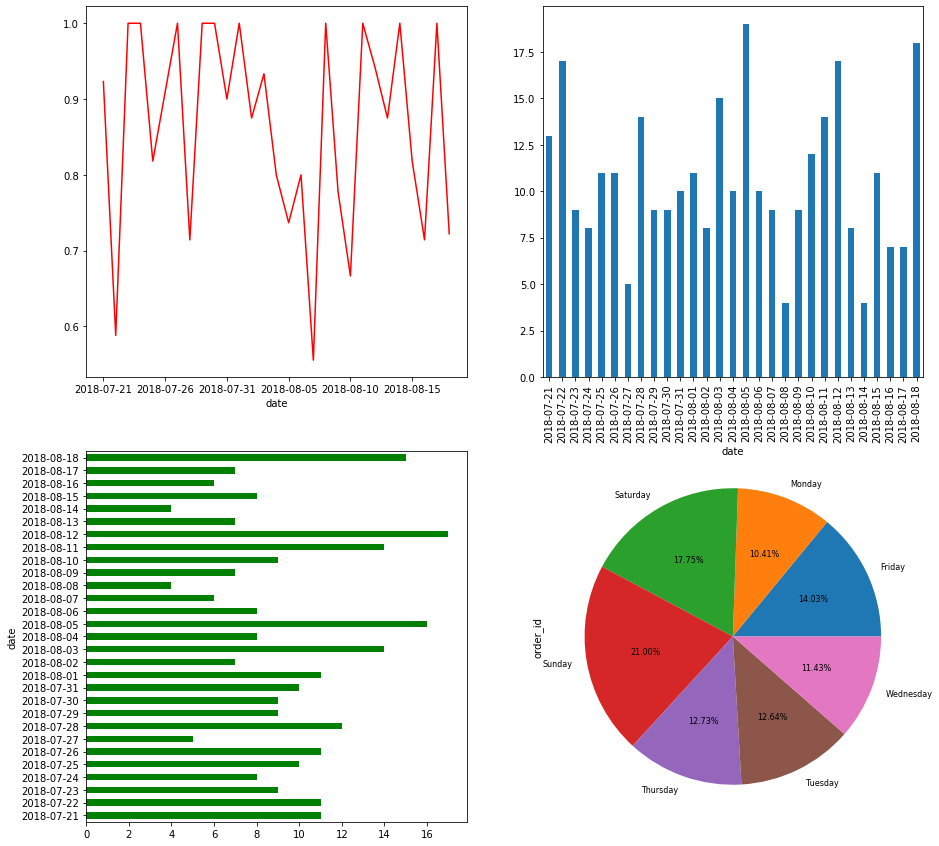

In [136]:
fig, axes = plt.subplots(nrows=2, ncols=2)

trx_rate['order_cnt'].plot(kind = 'bar',figsize=(15,15), ax = axes[0,1])
trx_rate['completed_rate'].plot(kind = 'line', color = 'r', ax = axes[0,0])
trx_rate['resto_unique_cnt'].plot(kind = 'barh',color = 'g', ax = axes[1,0])
# trx_rate['customer_unique_cnt'].plot(kind = 'bar', color = 'b', ax = axes[1,1])
fig_save = trx_cnt_day.plot(kind = 'pie', autopct='%.2f%%', fontsize=8,ax = axes[1,1])

In [137]:
## save figure
fig_save.get_figure().savefig(PLOT_RES+'subplots.png')

## Boxplot

In [138]:
df_trx.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id,date,day,is_completed
0,FOOD-10455,0,2018-08-12 20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149,2018-08-12,Sunday,1
1,FOOD-10985,0,2018-09-23 17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936,2018-09-23,Sunday,1
2,FOOD-10911,0,2018-09-19 18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026,2018-09-19,Wednesday,1
3,FOOD-10932,0,2018-09-21 01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377,2018-09-21,Friday,1
4,FOOD-10961,0,2018-09-22 17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587,2018-09-22,Saturday,1


In [151]:
# df_trx['eta_seconds'].plot(kind = 'box')
df_trx['eta_seconds'].describe()

count    1076.000000
mean     1632.289033
std       948.628732
min         2.000000
25%      1074.750000
50%      1605.500000
75%      2151.000000
max      6082.000000
Name: eta_seconds, dtype: float64

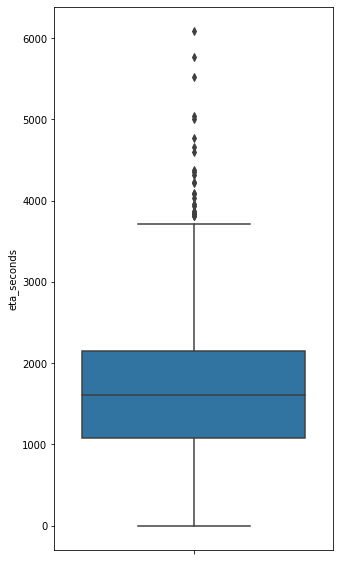

In [144]:
plt.figure(figsize = (5,10))
sns.boxplot(data = df_trx, y = 'eta_seconds')

# upper bound  = Q3 + (1.5*(Q3-Q1))
# lower bound  = Q1 - (1.5*(Q3-Q1))

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


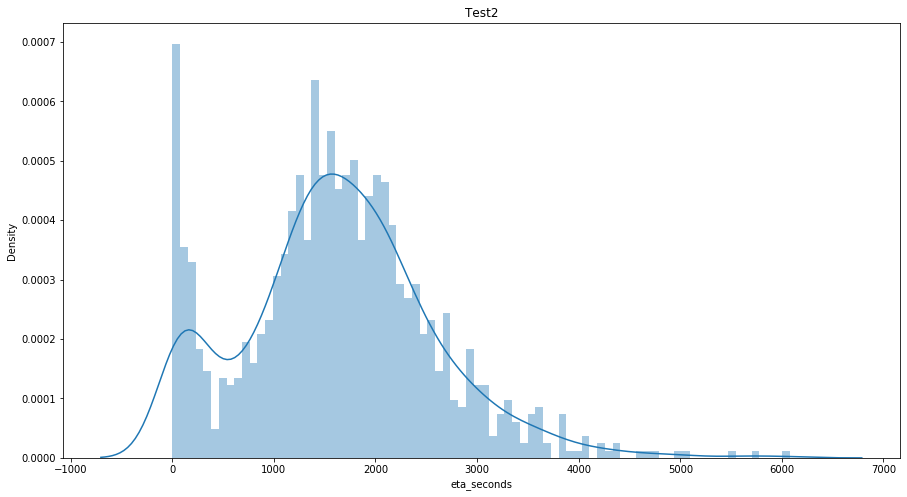

In [153]:
plt.figure(figsize=(15,8))
plt.title('Test2')
sns.distplot(df_trx['eta_seconds'],label = 'eta dist All', bins = 80)

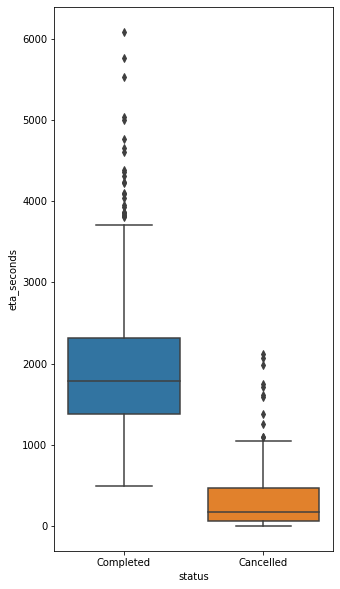

In [145]:
plt.figure(figsize = (5,10))
sns.boxplot(data = df_trx, y = 'eta_seconds', x = 'status')

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


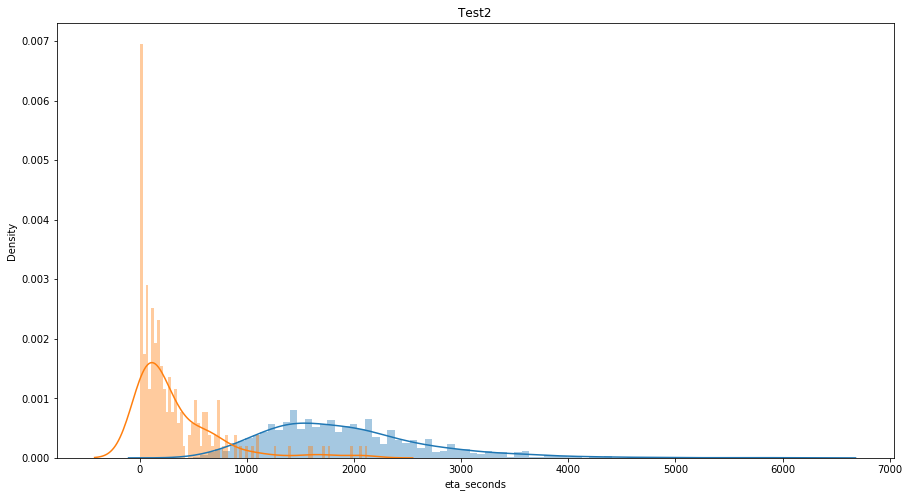

In [152]:
plt.figure(figsize=(15,8))
plt.title('Test2')
sns.distplot(df_trx[df_trx['status'] == 'Completed']['eta_seconds'],label = 'eta dist Complete', bins = 80)
sns.distplot(df_trx[df_trx['status'] == 'Cancelled']['eta_seconds'],label = 'eta dist Cancel', bins = 80)

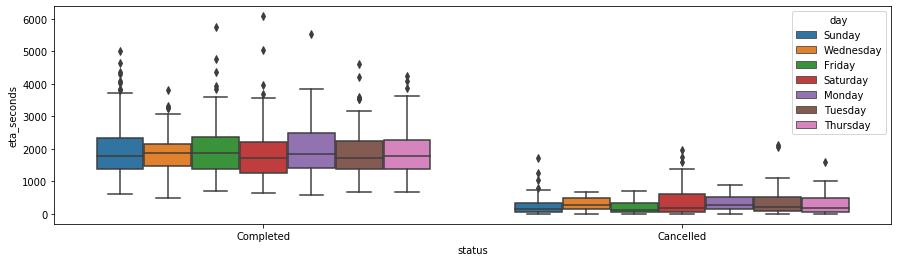

In [149]:
plt.figure(figsize = (15,4))
sns.boxplot(data = df_trx, y = 'eta_seconds', x = 'status',hue = 'day')

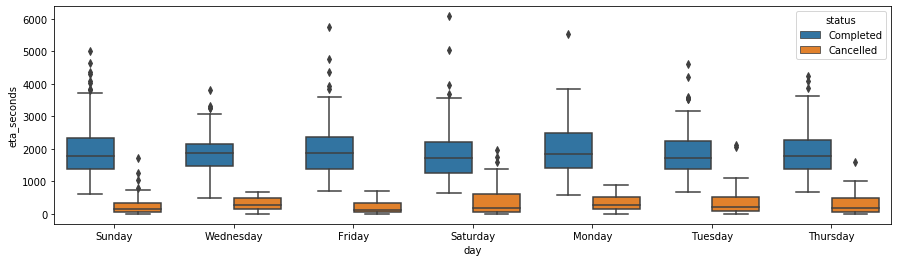

In [150]:
plt.figure(figsize = (15,4))
sns.boxplot(data = df_trx, y = 'eta_seconds', hue = 'status',x = 'day')

## HeatMap and Scatterplot

In [154]:
df_trx = df_trx0.copy()

In [155]:
df_trx.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587


In [159]:
df_trx[['food_price','eta_seconds','delivery_fee']].corr()

,food_price,eta_seconds,delivery_fee
food_price,1.000000,0.226364,0.297295
eta_seconds,0.226364,1.000000,0.053672
delivery_fee,0.297295,0.053672,1.000000


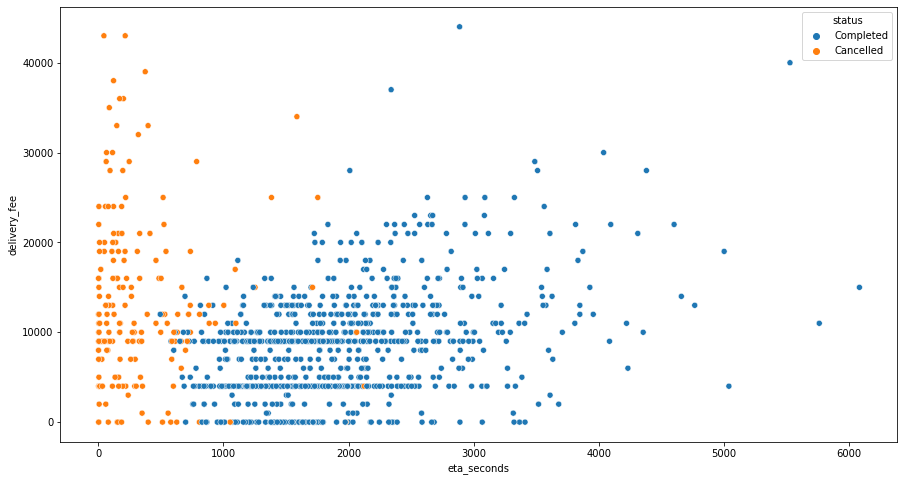

In [160]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = df_trx, x = 'eta_seconds', y = 'delivery_fee',
               hue = 'status'
               )

In [162]:
b0 = [5*60*i for i in range(10)]
L0 = [str((i+1)*5)+'_mins' for i in range(9)]
df_trx['durations_grp'] = pd.cut(df_trx.eta_seconds,bins = b0,labels =L0)

b1 = [30000*i for i in range(10)]
L1 = [str((i+1)*30)+'k_rupiah' for i in range(9)]
df_trx['food_price_grp'] = pd.cut(df_trx.food_price,bins = b1,labels =L1)

In [168]:
df_trx.head()

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id,durations_grp,food_price_grp
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149,30_mins,30k_rupiah
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936,40_mins,150k_rupiah
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026,25_mins,60k_rupiah
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377,35_mins,60k_rupiah
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587,30_mins,90k_rupiah


In [169]:
df_matx =df_trx.groupby(['food_price_grp','durations_grp']).size().unstack()
df_matx

durations_grp,5_mins,10_mins,15_mins,20_mins,25_mins,30_mins,35_mins,40_mins,45_mins
food_price_grp,,,,,,,,,
30k_rupiah,16,4,21,18,42,26,18,6,3
60k_rupiah,48,12,20,56,68,57,45,39,12
90k_rupiah,22,11,8,13,25,39,32,27,15
120k_rupiah,11,3,6,4,11,18,19,18,13
150k_rupiah,11,3,2,5,5,15,9,5,5
180k_rupiah,8,2,1,4,2,6,3,13,4
210k_rupiah,3,1,0,0,1,3,3,4,1
240k_rupiah,1,0,0,0,1,2,1,1,0
270k_rupiah,5,0,0,0,0,0,2,1,3


In [170]:
df_matx.sum()

durations_grp
5_mins     125
10_mins     36
15_mins     58
20_mins    100
25_mins    155
30_mins    166
35_mins    132
40_mins    114
45_mins     56
dtype: int64

In [180]:
df_matx2 = (df_matx/df_matx.sum()).transpose()
df_matx2

food_price_grp,30k_rupiah,60k_rupiah,90k_rupiah,120k_rupiah,150k_rupiah,180k_rupiah,210k_rupiah,240k_rupiah,270k_rupiah
durations_grp,,,,,,,,,
5_mins,0.128000,0.384000,0.176000,0.088000,0.088000,0.064000,0.024000,0.008000,0.040000
10_mins,0.111111,0.333333,0.305556,0.083333,0.083333,0.055556,0.027778,0.000000,0.000000
15_mins,0.362069,0.344828,0.137931,0.103448,0.034483,0.017241,0.000000,0.000000,0.000000
20_mins,0.180000,0.560000,0.130000,0.040000,0.050000,0.040000,0.000000,0.000000,0.000000
25_mins,0.270968,0.438710,0.161290,0.070968,0.032258,0.012903,0.006452,0.006452,0.000000
30_mins,0.156627,0.343373,0.234940,0.108434,0.090361,0.036145,0.018072,0.012048,0.000000
35_mins,0.136364,0.340909,0.242424,0.143939,0.068182,0.022727,0.022727,0.007576,0.015152
40_mins,0.052632,0.342105,0.236842,0.157895,0.043860,0.114035,0.035088,0.008772,0.008772
45_mins,0.053571,0.214286,0.267857,0.232143,0.089286,0.071429,0.017857,0.000000,0.053571


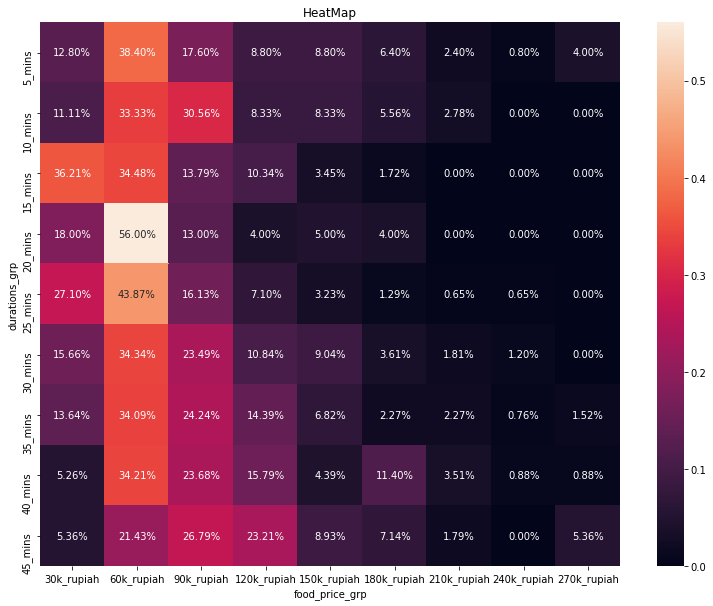

In [181]:
plt.figure(figsize = (13,10))
plt.title('HeatMap')
fig_save=sns.heatmap(data = df_matx2,
           annot = True, fmt = '.2%')

In [176]:
## save figure
fig_save.get_figure().savefig(PLOT_RES+'heatmap1.png')